In [1]:
# import dependencies
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook  <----- use for better visuals, but may impede view
#pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [2]:
#Read CSV
Youtube_Data = pd.read_csv('US_youtube_trending_data.csv')

# Convert CSV to Data Frame
Youtube_Data = pd.DataFrame(Youtube_Data)

# preview Data Frame
Youtube_Data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
# Preview last 5 rows of Data Frame
Youtube_Data.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
143385,1GOzQD9H9bo,Drought Discoveries: Father-son duo document f...,2022-07-19T13:17:03Z,UCpR_4YnLJAphcr0VI5yR5SA,FOX5 Las Vegas,25,2022-07-25T00:00:00Z,KVVU|Fox5|Fox5Vegas|Las Vegas|Vegas,414168,3509,0,672,https://i.ytimg.com/vi/1GOzQD9H9bo/default.jpg,False,False,DROUGHT DISCOVERIES: A father-son duo has been...
143386,zrLxSgh5YxU,Funeral held for Ivana Trump,2022-07-20T21:36:49Z,UCIjSUWHWp6KohfnR5OQTXnQ,FOX 5 New York,25,2022-07-25T00:00:00Z,ivana trump funeral|ivana trump dies|ivana tru...,728579,6243,0,875,https://i.ytimg.com/vi/zrLxSgh5YxU/default.jpg,False,False,"Former President Donald Trump, all his childre..."
143387,avi9iBC8opU,'Which Uses More Electricity...A Refrigerator ...,2022-07-19T17:00:01Z,UCg40OxZ1GYh3u3jBntB6DLg,Forbes Breaking News,25,2022-07-25T00:00:00Z,Rep. Thomas Massie|Sec. Pete Buttigieg|House,924917,19340,0,9553,https://i.ytimg.com/vi/avi9iBC8opU/default.jpg,False,False,At today's House Transportation Committee hear...
143388,4tYuIU7pLmI,JACK - J97 | NGÔI SAO CÔ ĐƠN | OFFICIAL MUSIC ...,2022-07-19T13:09:08Z,UChUJa1JyBc7Lc4orkiNKKQg,J97,10,2022-07-25T00:00:00Z,J97|jack|phương tuấn|jack phương tuấn|j 97|jac...,13706188,694419,0,207765,https://i.ytimg.com/vi/4tYuIU7pLmI/default.jpg,False,False,JACK - J97 | NGÔI SAO CÔ ĐƠN | OFFICIAL MUSIC ...
143389,YB-zx_P_51I,Better Call Saul Season 6 Episode 9 Breakdown ...,2022-07-19T16:24:02Z,UC8zAiZUuUXe-touFVopBbZw,Pete Peppers,24,2022-07-25T00:00:00Z,better call saul|better call saul season 6 epi...,323192,9936,0,2345,https://i.ytimg.com/vi/YB-zx_P_51I/default.jpg,False,False,Better Call Saul Season 6 Episode 9 Breakdown ...


In [4]:
Youtube_Data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [5]:
# Observe Data Types
Youtube_Data.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [6]:
# Number of Records in data
len(Youtube_Data)

143390

In [7]:
print ("Rows     : " , Youtube_Data.shape[0]) #Displays numbers of rows .
print ("Columns  : " , Youtube_Data.shape[1]) # and column our dataset contains.
print ("\nFeatures : \n", Youtube_Data.columns.tolist())#displays column names
print ("\nMissing values :  ", Youtube_Data.isnull().sum().values.sum())   #find missing values
print ("\nUnique values :  \n", Youtube_Data.nunique())  # Count distinct observations

Rows     :  143390
Columns  :  16

Features : 
 ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Missing values :   3663

Unique values :  
 video_id              26273
title                 26896
publishedAt           25881
channelId              6065
channelTitle           6175
categoryId               15
trending_date           697
tags                  19117
view_count           139730
likes                 98006
dislikes              13179
comment_count         28951
thumbnail_link        26273
comments_disabled         2
ratings_disabled          2
description           26843
dtype: int64


In [8]:
# finding number of null records for each column
Youtube_Data.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3663
dtype: int64

In [9]:
# Dropping unecessary columns
Youtube_Data = Youtube_Data.drop(columns=['tags','comment_count','thumbnail_link','comments_disabled','ratings_disabled','description'])

In [10]:
# Renaming columns
Youtube_Data = Youtube_Data.rename(columns={'likes':'Likes','dislikes':'Dislikes',
                                            'channelTitle':'Channel Title','channelTitle':'Channel Title',
                                           'video_id':'Video ID','channelId':'Channel ID'})

In [11]:
# First five rows of updated Data Frame
Youtube_Data.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964


In [12]:
# add new column that would contain latest view_count for the particular video.
#since number of views keep on increasing everyday , we will be using only single observation against a video id.
Youtube_Data['count_max_view'] = Youtube_Data.groupby(['Video ID'])['view_count'].transform(max)

In [13]:
# Renaming Data Frame
Youtube_Unique_Video_Id = Youtube_Data

In [14]:
#changing published date , trending_date to datetime datatype.
Youtube_Unique_Video_Id.publishedAt= pd.to_datetime(Youtube_Unique_Video_Id.publishedAt)
Youtube_Unique_Video_Id.trending_date= pd.to_datetime(Youtube_Unique_Video_Id.trending_date)

In [15]:
#Adding column for year and month to the dataframe
Youtube_Unique_Video_Id['Year']=Youtube_Unique_Video_Id['publishedAt'].dt.year
Youtube_Unique_Video_Id['Month']=Youtube_Unique_Video_Id.publishedAt.dt.month

In [16]:
# make a new dataframe with only single observations for each id.
Youtube_Unique_Video_Id = Youtube_Data.loc[Youtube_Data.view_count == Youtube_Data.count_max_view]
# Youtube_Unique_Video_Id.loc[Youtube_Unique_Video_Id.Year == 2021, 'title'].count()

In [17]:
# Use Youtube_Unique_Video_Id for main dataset

In [18]:
# Number of unique records in each column
Youtube_Unique_Video_Id.nunique()

Video ID          26273
title             26144
publishedAt       25881
Channel ID         6062
Channel Title      6156
categoryId           15
trending_date       697
view_count        26156
Likes             24122
Dislikes           5614
count_max_view    26156
Year                  3
Month                12
dtype: int64

In [19]:
Youtube_Unique_Video_Id.duplicated(subset=['Video ID'])

172       False
173       False
174       False
175       False
176       False
          ...  
143385    False
143386    False
143387    False
143388    False
143389    False
Length: 26360, dtype: bool

In [20]:
Reocurring_Trending_Videos = Youtube_Unique_Video_Id.groupby(['Video ID']).count().sort_values(by='title',ascending=False)
Reocurring_Trending_Videos.head(10)

,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month
Video ID,,,,,,,,,,,,
69KrkMpvZdg,8,8,8,8,8,8,8,8,8,8,8,8
hAxqygRdM4g,7,7,7,7,7,7,7,7,7,7,7,7
AWXvClaRtsI,7,7,7,7,7,7,7,7,7,7,7,7
ZoPJVcHYlU0,6,6,6,6,6,6,6,6,6,6,6,6
Isim0ysZ6X4,5,5,5,5,5,5,5,5,5,5,5,5
ifJYb2An7wE,5,5,5,5,5,5,5,5,5,5,5,5
BxOEj8ZeX2g,5,5,5,5,5,5,5,5,5,5,5,5
kmk5vciFbek,4,4,4,4,4,4,4,4,4,4,4,4
Hb3rmh-_FMw,4,4,4,4,4,4,4,4,4,4,4,4


In [21]:
Youtube_Unique_Video_Id.loc[Youtube_Unique_Video_Id['Video ID'] == '69KrkMpvZdg']

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month
49396,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-20 00:00:00+00:00,0,0,0,0,2021,4
49597,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-21 00:00:00+00:00,0,0,0,0,2021,4
49810,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-22 00:00:00+00:00,0,0,0,0,2021,4
50050,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-23 00:00:00+00:00,0,0,0,0,2021,4
50283,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-24 00:00:00+00:00,0,0,0,0,2021,4
50504,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-25 00:00:00+00:00,0,0,0,0,2021,4
50735,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-26 00:00:00+00:00,0,0,0,0,2021,4
50969,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19 15:00:08+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-27 00:00:00+00:00,0,0,0,0,2021,4


In [22]:
# display data frame first five rows
Youtube_Unique_Video_Id.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month
172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8
173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,2020-08-12 00:00:00+00:00,938198,44088,565,938198,2020,8
174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,1722152,169501,927,1722152,2020,8
175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,2020-08-12 00:00:00+00:00,1090847,10922,2517,1090847,2020,8
176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,2020-08-12 00:00:00+00:00,971704,23311,1987,971704,2020,8


In [23]:
# Basic Statistics for Data Frame
Youtube_Unique_Video_Id.describe().applymap('{:,.2f}'.format)

,categoryId,view_count,Likes,Dislikes,count_max_view,Year,Month
count,"26,360.00","26,360.00","26,360.00","26,360.00","26,360.00","26,360.00","26,360.00"
mean,18.86,"2,768,747.43","137,858.98","2,127.44","2,768,747.43","2,021.10",6.58
std,6.72,"6,759,415.57","392,570.24","11,043.76","6,759,415.57",0.70,3.44
min,1.00,0.00,0.00,0.00,0.00,"2,020.00",1.00
25%,17.00,"572,640.00","20,358.25",0.00,"572,640.00","2,021.00",4.00
50%,20.00,"1,170,919.50","49,100.00",395.00,"1,170,919.50","2,021.00",7.00
75%,24.00,"2,569,704.50","123,891.25","1,384.00","2,569,704.50","2,022.00",10.00
max,29.00,"264,407,389.00","16,021,534.00","879,354.00","264,407,389.00","2,022.00",12.00


In [24]:
# gives us various count of video in each channel category
Youtube_Unique_Video_Id.groupby("categoryId").size().reset_index(name="View Count") \
    .sort_values("View Count", ascending=False).head(20)

,categoryId,View Count
9,24,5229
6,20,5016
2,10,4260
4,17,3094
7,22,2382
8,23,1410
0,1,1033
10,25,1021
13,28,828
11,26,759


In [26]:
#Getting category for the category file
#we need id and title from this file which are under items tag and snippet contain title
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [27]:
df_category = pd.DataFrame(category,columns=['categoryId','category']) 
df_category.head(20)

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [28]:
df_category.categoryId=df_category.categoryId.astype('int64')
#merge YT Data Frame and df_category to get category names
df_merge = Youtube_Unique_Video_Id.merge(df_category, on = 'categoryId', how = 'inner')
df_merge.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,category
0,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8,Howto & Style
1,8r1D-vNUWsg,☁️ 🍞 CLOUD BREAD,2020-08-09 00:00:04+00:00,UCzqbfYjQmf9nLQPMxVgPhiA,emmymadeinjapan,26,2020-08-14 00:00:00+00:00,993107,41182,650,993107,2020,8,Howto & Style
2,XlOLx3fyf10,TESTING TIKTOK ART TUTORIALS,2020-08-08 20:00:03+00:00,UCD4XIm3ZFhT72WjqhIXMN9w,LavenderTowne,26,2020-08-14 00:00:00+00:00,407183,42644,347,407183,2020,8,Howto & Style
3,KnE6u4hFx14,PAINTING OUR FACES ON BRENT'S NEW HOUSE! (REVE...,2020-08-08 20:45:05+00:00,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,26,2020-08-15 00:00:00+00:00,4782509,207021,3637,4782509,2020,8,Howto & Style
4,YwJyis4yOEA,ANSWERING YOUR ASSUMPTIONS ABOUT US 😭,2020-08-09 13:46:28+00:00,UC21yq4sq8uxTcfgIxxyE9VQ,Carli Bybel,26,2020-08-15 00:00:00+00:00,350066,20393,379,350066,2020,8,Howto & Style


In [29]:
# Create summary chart for video counts by categories
agg_func_count = {'view_count': ['count', 'nunique', 'size']}
df_merge.groupby(['category']).agg(agg_func_count)

#change to clean data frame name
Youtube_Data_Updated_Merged = df_merge

In [30]:
# Youtube Data for 2020
YT_Data_2020 = df_merge.loc[(df_merge['Year']) >= 2020]

In [31]:
# Counts of video in each category published in 2020
YT_2020_Category_Summary = {'view_count': ['count', 'nunique', 'size']}
YT_2020_Category_Summary = YT_Data_2020.groupby(['category']).agg(agg_func_count).sort_values(by=('view_count','count'),ascending=False)

In [32]:
# mean, median, mode, and average of the video categories count list (max, min, mode)
# Calculate total likes
# Avaerage of likes against total volume of videos
# Correlation between like count and volume of views
YT_2020_Category_Summary

view_count              
                           count nunique  size
category                                      
Entertainment               5229    5208  5229
Gaming                      5016    5004  5016
Music                       4260    4238  4260
Sports                      3094    3086  3094
People & Blogs              2382    2378  2382
Comedy                      1410    1409  1410
Film & Animation            1033     999  1033
News & Politics             1021    1021  1021
Science & Technology         828     825   828
Howto & Style                759     759   759
Education                    598     594   598
Autos & Vehicles             472     471   472
Travel & Events              126     125   126
Pets & Animals               114     114   114
Nonprofits & Activism         18      18    18

In [33]:
df_merge.min()

Video ID                                                --14w5SOEUs
title             !@#$%$#!! || Dubov vs Carlsen || Airthings Mas...
publishedAt                               2020-08-03 21:51:14+00:00
Channel ID                                 UC--3pN-wtQrC48GAK8wsBsg
Channel Title                                      Adams_fyp Shorts
categoryId                                                        1
trending_date                             2020-08-12 00:00:00+00:00
view_count                                                        0
Likes                                                             0
Dislikes                                                          0
count_max_view                                                    0
Year                                                           2020
Month                                                             1
category                                           Autos & Vehicles
dtype: object

In [34]:
# creating same summary table, but instead using .loc to grab data only from time period needed (08/20-08/21)

# Defining COVID Date Range for Data
COVID_Start_Date = '2020-08-01'
COVID_End_Date = '2021-08-31'

# Filtering Youtube Data for 08/2020-08/2021 (Project's COVID period)
YT_Data_COVID = df_merge.loc[(df_merge['publishedAt'] >= COVID_Start_Date) & (df_merge['publishedAt'] <= COVID_End_Date)]
                            

# Counts of video in each category published in 2020
YT_COVID_Category_Summary = {'view_count': ['count']}
YT_COVID_Category_Summary = YT_Data_COVID.groupby(['category']).agg(agg_func_count).sort_values(by=('view_count','count'),ascending=False)

# mean, median, mode, and average of the video categories count list (max, min, mode)
# Calculate total likes
# Avaerage of likes against total volume of videos
# Correlation between like count and volume of views

# Convert to Data Frame
YT_COVID_Category_Summary = pd.DataFrame(YT_COVID_Category_Summary)

YT_COVID_Category_Summary

view_count              
                           count nunique  size
category                                      
Entertainment               2663    2644  2663
Music                       2539    2521  2539
Gaming                      2035    2029  2035
Sports                      1683    1676  1683
People & Blogs              1098    1095  1098
Comedy                       678     677   678
News & Politics              565     565   565
Science & Technology         505     502   505
Film & Animation             502     484   502
Howto & Style                439     439   439
Education                    273     269   273
Autos & Vehicles             244     243   244
Pets & Animals                72      72    72
Travel & Events               47      46    47
Nonprofits & Activism         11      11    11

In [35]:
# creating same summary table, but instead using .loc to grab data only from Post-COVID

# Filtering Youtube Data for 09/2021-07/2022 (Project's post-COVID period)
YT_Data_PostCOVID = df_merge.loc[(df_merge['publishedAt'] > COVID_End_Date)]

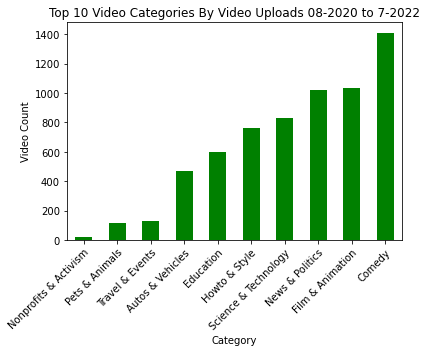

In [36]:
# Top 10 videos by category for all data (08/2020-07/25/22)
df_merge.groupby(df_merge['category']).size().sort_values(ascending=True).head(10).plot(kind='bar',color='green')
plt.title('Top 10 Video Categories By Video Uploads 08-2020 to 7-2022')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.savefig('Question 2/Top 10 Video Categories By Video Uploads 08-2020 to 7-2022.png', bbox_inches='tight')
plt.show()

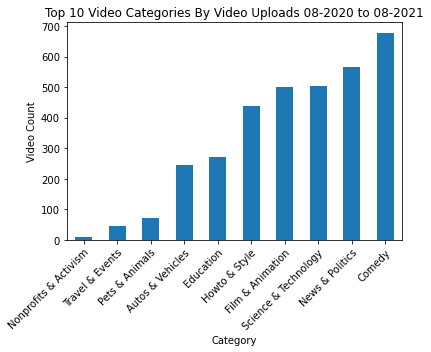

In [37]:
# Top 10 videos by category for COVID time-frame data (08/2020-08/2021)
YT_Data_COVID.groupby(YT_Data_COVID['category']).size().sort_values(ascending=True).head(10).plot(kind='bar',color='tab:blue')
plt.title('Top 10 Video Categories By Video Uploads 08-2020 to 08-2021')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.savefig('Question 2/Top 10 Video Categories By Video Uploads 08-2020 to 08-2021.png', bbox_inches='tight')
plt.show()

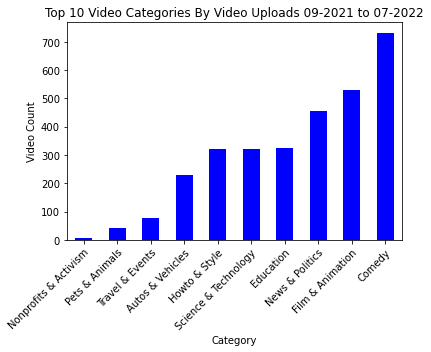

In [38]:
# Top 10 videos by category for post-COVID time-frame data (09/2021-07/2022)
YT_Data_PostCOVID.groupby(YT_Data_PostCOVID['category']).size().sort_values(ascending=True).head(10).plot(kind='bar',color='blue')
plt.title('Top 10 Video Categories By Video Uploads 09-2021 to 07-2022')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.savefig('Question 2/Top 10 Video Categories By Video Uploads 09-2021 to 07-2022.png', bbox_inches='tight')
plt.show()

In [39]:
# Showing the average view count of popular trending videos by category for all data from Aug 2020-July 2022
All_Category_Mean_View_Count = \
df_merge.groupby('category').mean('view_count')['view_count'].sort_values(ascending=True).map('{:.0f}'.format)

All_Category_Mean_View_Count

category
Autos & Vehicles         1191068
Pets & Animals           1521522
News & Politics          1528217
Travel & Events          1532214
Howto & Style            1714218
Sports                   1814932
Comedy                   1998578
Gaming                   2087777
Nonprofits & Activism    2145072
People & Blogs           2245541
Education                2313303
Film & Animation         2571047
Science & Technology     2905187
Entertainment            3133318
Music                    5181233
Name: view_count, dtype: object

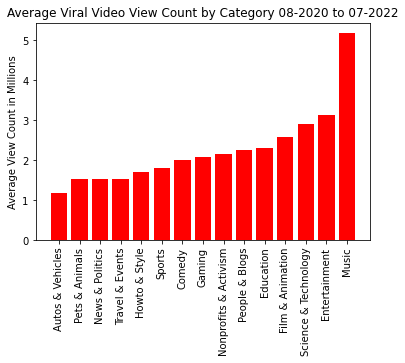

In [40]:
# Showing the average view count of popular trending videos by category during COVID scope (08/2020-07/2022)
All_Category_Mean_View_Count_Mill = All_Category_Mean_View_Count.values.astype("float")/1000000
plt.bar(All_Category_Mean_View_Count.index, All_Category_Mean_View_Count_Mill,color='red')
# Setting axis labels
plt.title('Average Viral Video View Count by Category 08-2020 to 07-2022')
plt.xticks(rotation='vertical')
# plt.xlabel('Category')
plt.ylabel('Average View Count in Millions')
plt.savefig('Question 2/Average Viral Video View Count by Category 08-2020 to 07-2022.png', bbox_inches='tight')
plt.show()

In [41]:
# Showing the average view count of popular trending videos by category during COVID scope (08/2020-08/2021)
COVID_Category_Mean_View_Count = \
YT_Data_COVID.groupby('category').mean('view_count')['view_count'].sort_values(ascending=True).map('{:.0f}'.format)

COVID_Category_Mean_View_Count

category
Travel & Events           791088
Nonprofits & Activism    1192750
Autos & Vehicles         1461718
News & Politics          1632638
Pets & Animals           1637415
Comedy                   1770271
Education                1859962
Sports                   1879827
Howto & Style            1907937
Film & Animation         2416790
Gaming                   2748972
People & Blogs           2796095
Science & Technology     3095887
Entertainment            3363066
Music                    5570671
Name: view_count, dtype: object

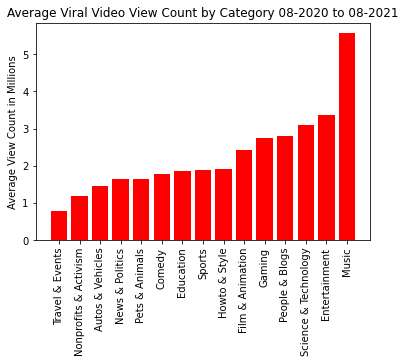

In [42]:
# Showing the average view count of popular trending videos by category during COVID scope (08/2020-08/2021)
COVID_Category_Mean_View_Count_Mill = COVID_Category_Mean_View_Count.values.astype("float")/1000000
plt.bar(COVID_Category_Mean_View_Count.index, COVID_Category_Mean_View_Count_Mill,color='red')
# Setting axis labels
plt.title('Average Viral Video View Count by Category 08-2020 to 08-2021')
plt.xticks(rotation='vertical')
# plt.xlabel('Category')
plt.ylabel('Average View Count in Millions')
plt.savefig('Question 2/Average Viral Video View Count by Category 08-2020 to 08-2021.png', bbox_inches='tight')
plt.show()

In [43]:
# Showing the average view count of popular trending videos by category after COVID scope (09/2021-07/2022)
PostCOVID_Category_Mean_View_Count = \
YT_Data_PostCOVID.groupby('category').mean('view_count')['view_count'].sort_values(ascending=True).map('{:.0f}'.format)

PostCOVID_Category_Mean_View_Count

category
Autos & Vehicles          901426
Pets & Animals           1322850
News & Politics          1398835
Howto & Style            1448460
Gaming                   1636408
Sports                   1737528
People & Blogs           1774740
Travel & Events          1973137
Comedy                   2210042
Science & Technology     2607033
Education                2694109
Film & Animation         2716880
Entertainment            2894885
Nonprofits & Activism    3641577
Music                    4606692
Name: view_count, dtype: object

In [44]:
PostCOVID_Category_Mean_View_Count_Mill = PostCOVID_Category_Mean_View_Count.values.astype("float")/1000000

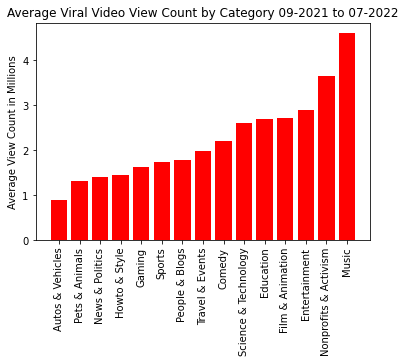

In [45]:
# Showing the average view count of popular trending videos by category after COVID scope (09/2021-07/2022)
plt.bar(PostCOVID_Category_Mean_View_Count.index, PostCOVID_Category_Mean_View_Count_Mill, color='red')
# Setting axis labels
plt.title('Average Viral Video View Count by Category 09-2021 to 07-2022')
plt.xticks(rotation='vertical')
# plt.xlabel('Category')
plt.ylabel('Average View Count in Millions')
plt.savefig('Question 2/Average Viral Video View Count by Category 09-2021 to 07-2022.png', bbox_inches='tight')
plt.show()

In [46]:
# Video Categories Averages Data Frame for full data set (08/2020-07/2022)
Category_viewCount_Likes_Dislikes = \
df_merge.groupby('category').mean().sort_values(by=['Likes','Dislikes'],ascending=False)#.map('{:,.0f}'.format)

Category_viewCount_Likes_Dislikes_All = pd.DataFrame(Category_viewCount_Likes_Dislikes)

Category_viewCount_Likes_Dislikes_All = Category_viewCount_Likes_Dislikes.round(0)

The r-squared is: 0.7850640214352173


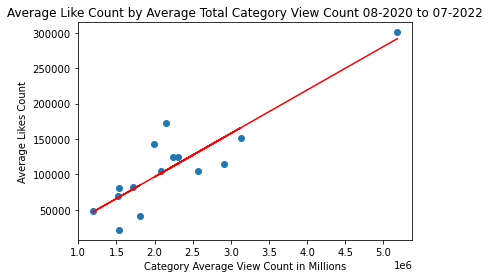

In [47]:
# Create Scatter plot and show correlation for full data set (08/2020-07/2022)
x_values = Category_viewCount_Likes_Dislikes['view_count']
y_values = Category_viewCount_Likes_Dislikes['Likes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,3),fontsize=15,color="red")
plt.title('Average Like Count by Average Total Category View Count 08-2020 to 07-2022')
plt.xlabel('Category Average View Count in Millions')
plt.ylabel('Average Likes Count')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Question 2/Average Like Count by Average Total Category View Count 08-2020 to 07-2022.png', bbox_inches='tight')
plt.show()

In [48]:
# Video Categories Averages Data Frame for COVID scope data (08/2020-08/2021)
Category_viewCount_Likes_Dislikes_COVID = \
YT_Data_COVID.groupby('category').mean().sort_values(by=['Likes','Dislikes'],ascending=False)#.map('{:,.0f}'.format)

Category_viewCount_Likes_Dislikes_COVID = pd.DataFrame(Category_viewCount_Likes_Dislikes_COVID)

Category_viewCount_Likes_Dislikes_COVID = Category_viewCount_Likes_Dislikes_COVID.round(0)

The r-squared is: 0.8677198027138445


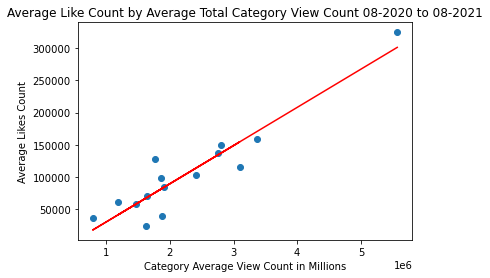

In [49]:
# Create Scatter plot and show correlation for COVID data (08/2020-08/2021)
x_values = Category_viewCount_Likes_Dislikes_COVID['view_count']
y_values = Category_viewCount_Likes_Dislikes_COVID['Likes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,3),fontsize=15,color="red")
plt.title('Average Like Count by Average Total Category View Count 08-2020 to 08-2021')
plt.xlabel('Category Average View Count in Millions')
plt.ylabel('Average Likes Count')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Question 2/Average Like Count by Average Total Category View Count 08-2020 to 08-2021.png', bbox_inches='tight')
plt.show()

In [50]:
# Video Categories Averages Data Frame for post-COVID scope data (09/2021-07/2022)
Category_viewCount_Likes_Dislikes_PostCOVID = \
YT_Data_PostCOVID.groupby('category').mean().sort_values(by=['Likes','Dislikes'],ascending=False)#.map('{:,.0f}'.format)

Category_viewCount_Likes_Dislikes_PostCOVID = pd.DataFrame(Category_viewCount_Likes_Dislikes_PostCOVID)

Category_viewCount_Likes_Dislikes_PostCOVID = Category_viewCount_Likes_Dislikes_PostCOVID.round(0)

The r-squared is: 0.7508154676053623


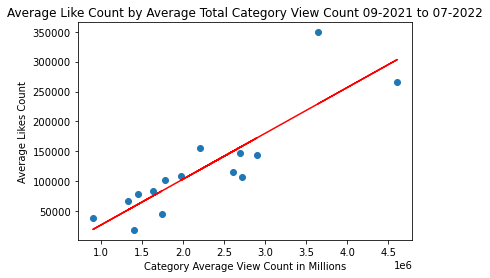

In [51]:
# Create Scatter plot and show correlation for COVID data (09/2021-07/2022)
x_values = Category_viewCount_Likes_Dislikes_PostCOVID['view_count']
y_values = Category_viewCount_Likes_Dislikes_PostCOVID['Likes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,3),fontsize=15,color="red")
plt.title('Average Like Count by Average Total Category View Count 09-2021 to 07-2022')
plt.xlabel('Category Average View Count in Millions')
plt.ylabel('Average Likes Count')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Question 2/Average Like Count by Average Total Category View Count 09-2021 to 07-2022.png', bbox_inches='tight')
plt.show()